# Expresso Churn Prediction.

In this dataset our team tried to use machine learning algorithms in order to predict whether client left the company or remained and for this task we used dataset from Expresso competition. In order to deliver better results, we followed machine learning lifecycle. For machine learning algorithm, we tried two types of ensembling methods with Gradient Boosting Machine from Scikit-learn as well as XGBoost classifier from XGBoost.

## 1. Basics.

In [1]:
# import basic packets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
df=pd.read_csv('Train.csv')

In [3]:
metadata = pd.read_csv('VariableDefinitions.csv')
metadata

,Variable Definitions,Unnamed: 1,Unnamed: 2
0,NaN,French,English
1,NaN,Le dataset churn comprend 19 variables dont 15...,The churn dataset includes 19 variables includ...
2,user_id,NaN,NaN
3,REGION,la localité de chaque client,the location of each client
4,TENURE,la durée dans le reseau,duration in the network
5,MONTANT,montant de recharge,top-up amount
6,FREQUENCE_RECH,nombre de fois que le client a fait une recharge,number of times the customer refilled
7,REVENUE,revenu mensuel de chaque client,monthly income of each client
8,ARPU_SEGMENT,revenu sur 90 jours/3,income over 90 days / 3
9,FREQUENCE,nombre de fois que client à fait un revenu,number of times the client has made an income


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [5]:
df.shape

(2154048, 19)

### Observation.

We have 2,154,048 rows of data with 18 features and 1 target. More than half of features are float, while rest of them are objects or integers values.

In [6]:
df.head(10)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,70.0,91.0,NaN,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0
7,0000313946b6849745963442c6e572d47cd24ced,DAKAR,K > 24 month,7000.0,16.0,7229.0,2410.0,22.0,1601.0,77.0,29.0,100.0,NaN,NaN,NO,55,All-net 500F=2000F;5d,8.0,0
8,0000398021ccd3a488fa1a63dee3b2f0d471f9fd,DAKAR,K > 24 month,1500.0,3.0,1502.0,501.0,12.0,NaN,2.0,53.0,2.0,NaN,NaN,NO,31,NaN,NaN,0
9,00003d165737109921ebd21f883cb8cff028b626,TAMBACOUNDA,K > 24 month,4000.0,8.0,4000.0,1333.0,8.0,NaN,1620.0,9.0,NaN,NaN,NaN,NO,45,On-net 500F_FNF;3d,8.0,0


### Let's see which entries contain missing values

<AxesSubplot:>

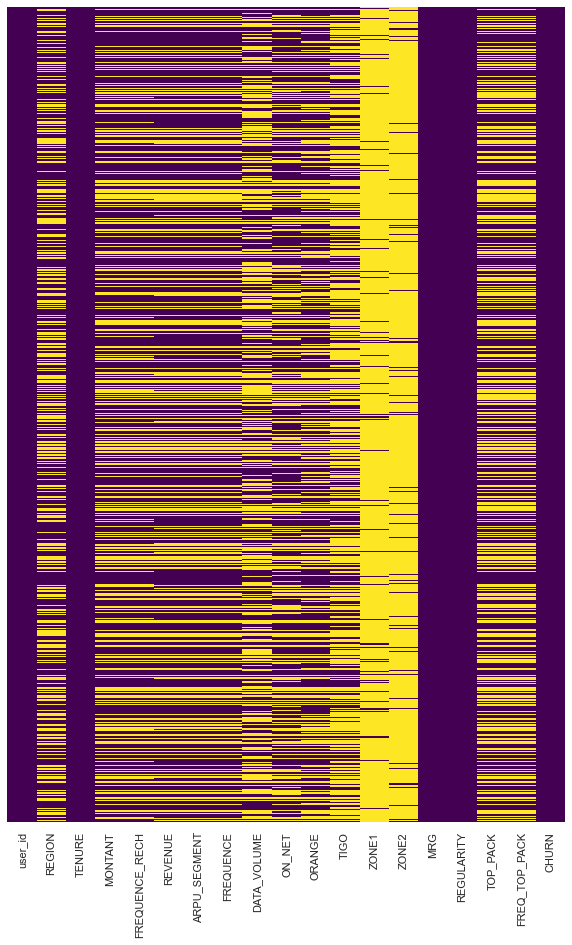

In [7]:
plt.figure(figsize=(10, 15))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Observation.

It seems that our dataset has A LOT OF missing values.

In [8]:
# Explore the target

df.CHURN.value_counts() 

0    1750062
1     403986
Name: CHURN, dtype: int64

### Observation.

We have class-imbalance dataset. In order to balance the dataset as well as to win processing time, we want to make undersampling, removing entries where values are equal to 0. There is a caveat, we will lose majority data. However, later we can retrain with full dataset with tuned hyperparameters.

In [9]:
positive = len(df[df['CHURN'] == 1])
negative_indices = df[df.CHURN == 0].index
random_indices = np.random.choice(negative_indices, positive, replace=False) # returns a randomly selected element from the specified sequence. 
positive_indices = df[df.CHURN == 1].index
under_sample_indices = np.concatenate([positive_indices,random_indices])
under_sample = df.loc[under_sample_indices]

In [10]:
original = df.copy() # preserve original data
df = under_sample.copy()

<AxesSubplot:xlabel='CHURN', ylabel='count'>

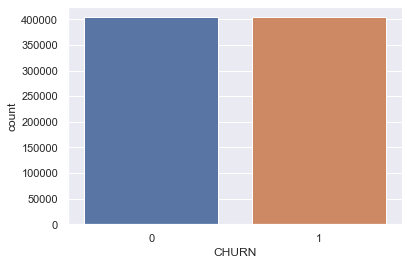

In [11]:
sns.countplot(x='CHURN', data=df)

## Handling Missing Values

In [12]:
round(df.describe(), 1)

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,376929.0,376929.0,389508.0,389508.0,389508.0,314193.0,370751.0,330146.0,219902.0,45031.0,37028.0,807972.0,327883.0,807972.0
mean,5059.0,10.5,4977.9,1659.3,12.7,3057.5,245.8,88.1,22.2,8.5,7.5,19.5,8.7,0.5
std,6816.0,12.8,6865.7,2288.6,14.2,13441.0,823.3,195.9,63.0,42.1,37.8,21.3,11.9,0.5
min,20.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
25%,1000.0,2.0,800.0,267.0,3.0,0.0,3.0,6.0,2.0,0.0,0.0,2.0,2.0,0.0
50%,2600.0,5.0,2500.0,833.0,7.0,200.0,19.0,24.0,6.0,1.0,2.0,8.0,4.0,0.5
75%,6550.0,14.0,6501.0,2167.0,18.0,2336.0,124.0,88.0,19.0,4.0,5.0,36.0,11.0,1.0
max,286500.0,115.0,323541.0,107847.0,91.0,1823866.0,45011.0,6429.0,3706.0,1839.0,3697.0,62.0,713.0,1.0


In [13]:
number_missing = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df) 
#isnull() function detect missing values in the given series object. 
#len() returns the number of elements in the list.
missing_value_df = pd.DataFrame({'number_missing': number_missing,
                                 'percent_missing': percent_missing})

missing_value_df

,number_missing,percent_missing
user_id,0,0.000000
REGION,488677,60.481923
TENURE,0,0.000000
MONTANT,431043,53.348755
FREQUENCE_RECH,431043,53.348755
REVENUE,418464,51.791894
ARPU_SEGMENT,418464,51.791894
FREQUENCE,418464,51.791894
DATA_VOLUME,493779,61.113380
ON_NET,437221,54.113385


### Observation. 

As it was mentioned, some columns are completely empty. Nevertheless let's how features are correlated to each other

<AxesSubplot:>

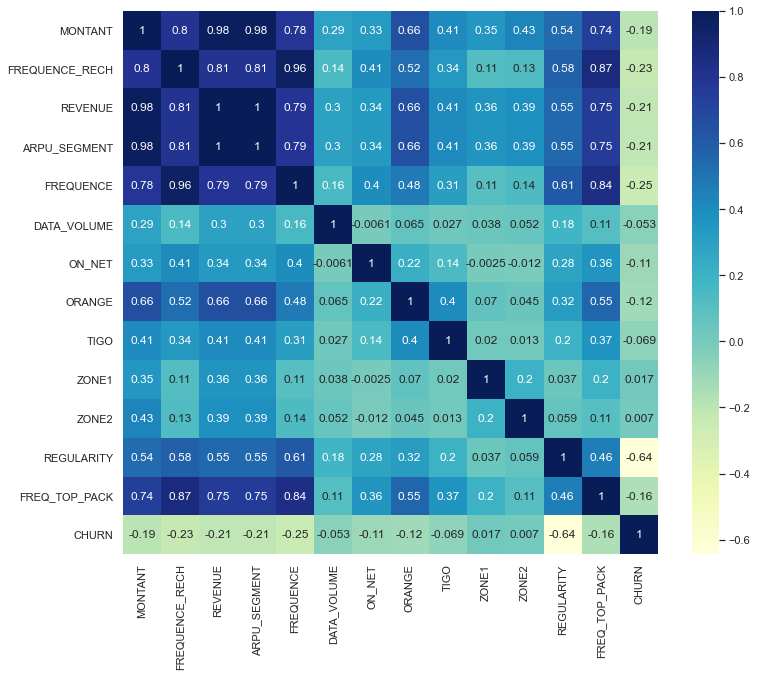

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

### Observation.

Some features really correlate with each other. Features such as Monthly income and average income of three months correlate with maximum value. However, none of these features strongly correlate with target column, showing only maximum negative correlation of 'regularity', while postively correlates only 'ZONE1' which has 94% null values.

In [15]:
categorical = ['REGION', 'TENURE', 'TOP_PACK', 'CHURN']

for i in categorical:
    print(i, '\n')
    print(df[i].value_counts())
    print('')

REGION 

DAKAR          125415
THIES           43920
SAINT-LOUIS     29068
LOUGA           24216
KAOLACK         24163
DIOURBEL        16855
TAMBACOUNDA     13417
KAFFRINE        10464
KOLDA            9335
FATICK           8635
MATAM            7135
ZIGUINCHOR       5585
SEDHIOU           812
KEDOUGOU          275
Name: REGION, dtype: int64

TENURE 

K > 24 month     759602
I 18-21 month     20036
H 15-18 month     11255
G 12-15 month      7047
J 21-24 month      5242
F 9-12 month       3877
E 6-9 month         647
D 3-6 month         266
Name: TENURE, dtype: int64

TOP_PACK 

All-net 500F=2000F;5d             81352
On net 200F=Unlimited _call24H    37427
Data:490F=1GB,7d                  32100
Data: 100 F=40MB,24H              22476
Mixt 250F=Unlimited_call24H       17709
                                  ...  
pack_chinguitel_24h                   1
150=unlimited pilot auto              1
pilot_offer7                          1
GPRS_3000Equal10GPORTAL               1
CVM_On-net 400f

Drop features that have large chunks of missing values as well as features that can't be imputed such as Region.

In [16]:
df.drop(['REGION', 'TIGO', 'MRG', 'ZONE1', 'ZONE2', ], axis=1, inplace=True)
df.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,1
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,G 12-15 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1
17,0000a45ed15492427df603217166f1f813a2cc83,H 15-18 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,1
21,0000b00bed6ad90fd35d1957f484f9e54990c714,I 18-21 month,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,36,NaN,NaN,1
22,0000b4af921db374095a9e7ab87ee314522e4fe4,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,1


In [17]:
round(df.MONTANT.describe(), 3)

count    376929.000
mean       5059.036
std        6816.046
min          20.000
25%        1000.000
50%        2600.000
75%        6550.000
max      286500.000
Name: MONTANT, dtype: float64

Instead of filling missing values with average of features, we decided to fill some of them with normal distribution of their mean and standard deviation. Thus every missing entry will have different values.

In [18]:
index = df[df.MONTANT.isna()].index 
#isna() function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA.
value = abs(np.random.normal(
    loc=df.MONTANT.mean(), scale=df.MONTANT.std(), size=df.MONTANT.isna().sum()))

df.MONTANT.fillna(pd.Series(value, index=index), inplace=True)

In [19]:
index = df[df.FREQUENCE_RECH.isna()].index
value = abs(np.random.normal(
    loc=df.FREQUENCE_RECH.mean(), scale=df.FREQUENCE_RECH.std(), size=df.FREQUENCE_RECH.isna().sum()))

df.FREQUENCE_RECH.fillna(pd.Series(value, index=index), inplace=True)

In [20]:
index = df[df.REVENUE.isna()].index
value = abs(np.random.normal(
    loc=df.REVENUE.mean(), scale=df.REVENUE.std(), size=df.REVENUE.isna().sum())) 
    #creates an array of specified shape and fills it with random values which is actually a part of Normal(Gaussian)Distribution. 

df.REVENUE.fillna(pd.Series(value, index=index), inplace=True) #to fill null values in a datasets

In [21]:
index = df[df.ARPU_SEGMENT.isna()].index
value = abs(np.random.normal(
    loc=df.ARPU_SEGMENT.mean(), scale=df.ARPU_SEGMENT.std(), size=df.ARPU_SEGMENT.isna().sum()))

df.ARPU_SEGMENT.fillna(pd.Series(value, index=index), inplace=True)

In [22]:
df.FREQUENCE.fillna(df.FREQUENCE.mean(), inplace=True)
df.DATA_VOLUME.fillna(df.DATA_VOLUME.mean(), inplace=True)
df.ON_NET.fillna(df.ON_NET.mean(), inplace=True)
df.ORANGE.fillna(df.ORANGE.mean(), inplace=True)
df.FREQ_TOP_PACK.fillna(df.FREQ_TOP_PACK.mean(), inplace=True)

For Top Package we decided to use imputer to handle missing values to get the maximum occuring category as well as giving some weight for filled NAN by creating new column.

In [23]:
# from https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893

def impute_nan_add_vairable(DataFrame,ColName):    
    #1. add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0)
    # .where() function returns the indices of elements in an input array where the given condition is satisfied.
    # .isnull() Detect missing values for an array-like object. 

    # 2. Take most occured category in that vairable (.mode())
    
    Mode_Category = DataFrame[ColName].mode()[0]
    #returns the robust measure of a central data point in a given range of data-sets.
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    
    DataFrame[ColName].fillna(Mode_Category,inplace=True)
    
    
impute_nan_add_vairable(df, 'TOP_PACK')

In [24]:
df.shape

(807972, 15)

In [25]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,CHURN,TOP_PACK_Imputed
count,807972.000000,807972.000000,807972.000000,807972.000000,807972.000000,8.079720e+05,807972.000000,807972.000000,807972.000000,807972.000000,807972.0,807972.000000
mean,6031.873613,12.082504,5952.490711,1983.950715,12.653170,3.057513e+03,245.809414,88.088240,19.490880,8.656420,0.5,0.594190
std,5980.238852,11.304309,6042.278328,2013.516131,9.839581,8.381665e+03,557.727385,125.250343,21.292197,7.600363,0.5,0.491048
min,0.016570,0.000003,0.013794,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,1.000000,0.0,0.000000
25%,1533.822279,3.000000,1500.000000,500.000000,8.000000,1.023000e+03,27.000000,43.000000,2.000000,6.000000,0.0,0.000000
50%,4431.434904,9.000000,4291.000000,1428.607960,12.653170,3.057513e+03,245.809414,88.088240,8.000000,8.656420,0.5,1.000000
75%,8825.630590,17.733002,8725.590978,2911.679288,12.653170,3.057513e+03,245.809414,88.088240,36.000000,8.656420,1.0,1.000000
max,286500.000000,115.000000,323541.000000,107847.000000,91.000000,1.823866e+06,45011.000000,6429.000000,62.000000,713.000000,1.0,1.000000


In [26]:
# plt.figure(figsize=(5, 5))
# sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

df.isnull().sum()

user_id             0
TENURE              0
MONTANT             0
FREQUENCE_RECH      0
REVENUE             0
ARPU_SEGMENT        0
FREQUENCE           0
DATA_VOLUME         0
ON_NET              0
ORANGE              0
REGULARITY          0
TOP_PACK            0
FREQ_TOP_PACK       0
CHURN               0
TOP_PACK_Imputed    0
dtype: int64

In [27]:
categorical = ['TENURE', 'TOP_PACK', 'CHURN']

for i in categorical:
    print(i, '\n')
    print(df[i].value_counts())
    print('')

TENURE 

K > 24 month     759602
I 18-21 month     20036
H 15-18 month     11255
G 12-15 month      7047
J 21-24 month      5242
F 9-12 month       3877
E 6-9 month         647
D 3-6 month         266
Name: TENURE, dtype: int64

TOP_PACK 

All-net 500F=2000F;5d             561441
On net 200F=Unlimited _call24H     37427
Data:490F=1GB,7d                   32100
Data: 100 F=40MB,24H               22476
Mixt 250F=Unlimited_call24H        17709
                                   ...  
pack_chinguitel_24h                    1
150=unlimited pilot auto               1
pilot_offer7                           1
GPRS_3000Equal10GPORTAL                1
CVM_On-net 400f=2200F                  1
Name: TOP_PACK, Length: 116, dtype: int64

CHURN 

1    403986
0    403986
Name: CHURN, dtype: int64



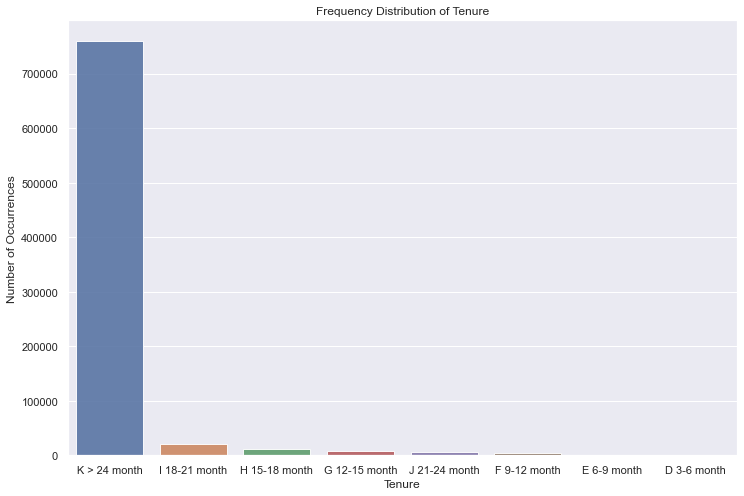

In [28]:
plt.figure(figsize=(12, 8))
sns.set(style="darkgrid")
tenure_count = df.TENURE.value_counts()
sns.barplot(x=tenure_count.index, y=tenure_count.values, alpha=0.9)
plt.title('Frequency Distribution of Tenure')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tenure', fontsize=12)
plt.show();

We are almost done preprocessing. However, TOP_PACKAGE has a lot of categories. By observing dataset we can conclude that some categories can be grouped together.

In [29]:
# this script to find assign corresponding variables to values that contain
# particular string

all_net = df[df.TOP_PACK.map(lambda x: x.lower().startswith('all'))] #startswith() function checks if a string starts with a specified substring.
#map() function can be used to apply a specific function to all elements within an iterable object.
on_net = df[df.TOP_PACK.map(lambda x: x.lower().startswith('on'))]
data = df[df.TOP_PACK.map(lambda x: x.lower().startswith('data'))]
mixt = df[df.TOP_PACK.map(lambda x: x.lower().startswith('mixt'))]

In [30]:
all_net.TOP_PACK.unique()

array(['All-net 500F=2000F;5d', 'All-net 500F =2000F_AllNet_Unlimited',
       'All-net 600F= 3000F ;5d', 'All-net 1000=5000;5d',
       'All-net 300=600;2d', 'All-net 1000F=(3000F On+3000F Off);5d',
       'All-net 500F=1250F_AllNet_1250_Onnet;48h',
       'All-net 500F=4000F ; 5d', 'All-net 5000= 20000off+20000on;30d',
       'All-net 500= 4000off+4000on;24H'], dtype=object)

In [31]:
on_net.TOP_PACK.unique()

array(['On-net 500=4000,10d', 'On-net 200F=60mn;1d',
       'On net 200F=Unlimited _call24H', 'On-net 500F_FNF;3d',
       'On-net 2000f_One_Month_100H; 30d', 'On-net 1000F=10MilF;10d',
       'On net 200F= 3000F_10Mo ;24H', 'On-net 300F=1800F;3d'],
      dtype=object)

In [32]:
data.TOP_PACK.unique()

array(['Data:1000F=2GB,30d', 'Data:490F=1GB,7d', 'Data: 200 F=100MB,24H',
       'Data:1000F=5GB,7d', 'Data: 100 F=40MB,24H',
       'Data:700F=SPPackage1,7d', 'Data:150F=SPPackage1,24H',
       'Data:200F=Unlimited,24H', 'Data:300F=100MB,2d',
       'Data:3000F=10GB,30d', 'Data:DailyCycle_Pilot_1.5GB',
       'Data:50F=30MB_24H', 'Data:30Go_V 30_Days', 'Data:1500F=3GB,30D',
       'Data:500F=2GB,24H', 'Data: 490F=Night,00H-08H',
       'Data:1500F=SPPackage1,30d', 'Data: 200F=1GB,24H',
       'Data:700F=1.5GB,7d', 'DataPack_Incoming', 'Data_EVC_2Go24H',
       'Data_Mifi_10Go_Monthly', 'Data_Mifi_10Go', 'Data_Mifi_20Go',
       'Data:OneTime_Pilot_1.5GB', 'Data:New-GPRS_PKG_1500F'],
      dtype=object)

In [33]:
mixt.TOP_PACK.unique()

array(['Mixt 250F=Unlimited_call24H',
       'MIXT:500F= 2500F on net _2500F off net;2d',
       'MIXT: 200mnoff net _unl on net _5Go;30d',
       'MIXT: 390F=04HOn-net_400SMS_400 Mo;4h\t',
       'MIXT: 590F=02H_On-net_200SMS_200 Mo;24h\t\t',
       'MIXT: 4900F= 10H on net_1,5Go ;30d',
       'MIXT:1000F=4250 Off net _ 4250F On net _100Mo; 5d',
       'Mixt : 500F=2500Fonnet_2500Foffnet ;5d',
       'MIXT:10000F=10hAllnet_3Go_1h_Zone3;30d\t\t',
       'MIXT: 5000F=80Konnet_20Koffnet_250Mo;30d\t\t',
       'MIXT: 500F=75(SMS, ONNET, Mo)_1000FAllNet;24h\t\t'], dtype=object)

In [34]:
df = df.replace(to_replace=all_net.TOP_PACK.unique(), value='all_net')
df = df.replace(to_replace=on_net.TOP_PACK.unique(), value='on_net')
df = df.replace(to_replace=data.TOP_PACK.unique(), value='data')
df = df.replace(to_replace=mixt.TOP_PACK.unique(), value='mixt')

df.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TOP_PACK_Imputed
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,9183.550839,3.698052,7689.221185,1504.700169,12.65317,3057.513089,245.809414,88.08824,4,all_net,8.65642,1,1
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,G 12-15 month,5080.356132,19.830637,51.914589,3150.969961,12.65317,3057.513089,245.809414,88.08824,2,all_net,8.65642,1,1
17,0000a45ed15492427df603217166f1f813a2cc83,H 15-18 month,494.147741,9.221623,5573.211766,1266.876538,12.65317,3057.513089,245.809414,88.08824,5,all_net,8.65642,1,1
21,0000b00bed6ad90fd35d1957f484f9e54990c714,I 18-21 month,1825.216925,16.826730,8376.084837,1306.807496,12.65317,0.000000,245.809414,88.08824,36,all_net,8.65642,1,1
22,0000b4af921db374095a9e7ab87ee314522e4fe4,K > 24 month,6136.220253,0.276481,4773.371753,1075.656566,12.65317,3057.513089,245.809414,88.08824,4,all_net,8.65642,1,1


We now just grouped only frequent packages. So let's merge rest of the values to 'others' category.

In [35]:
df.TOP_PACK.value_counts().index

Index(['all_net', 'data', 'on_net', 'mixt', 'Jokko_Daily',
       'IVR Echat_Daily_50F', 'VAS(IVR_Radio_Daily)', 'Twter_U2opia_Daily',
       'Twter_U2opia_Weekly', '200=Unlimited1Day', 'Jokko_promo',
       'Facebook_MIX_2D', 'WIFI_Family_2MBPS', 'New_YAKALMA_4_ALL',
       'Pilot_Youth4_490', 'CVM_on-net bundle 500=5000', 'MROMO_TIMWES_RENEW',
       'Jokko_Monthly', 'MROMO_TIMWES_OneDAY', 'Pilot_Youth1_290',
       'Yewouleen_PKG', 'Twter_U2opia_Monthly',
       'YMGX 100=1 hour FNF, 24H/1 month', 'Internat: 1000F_Zone_1;24H\t\t',
       'SUPERMAGIK_5000', 'Jokko_Weekly', 'FNF2 ( JAPPANTE)', 'Staff_CPE_Rent',
       'WIFI_ Family _4MBPS', 'SUPERMAGIK_1000', '200F=10mnOnNetValid1H',
       'EVC_500=2000F', 'FIFA_TS_daily', 'VAS(IVR_Radio_Monthly)',
       'Internat: 2000F_Zone_2;24H\t\t', 'IVR Echat_Weekly_200F',
       'TelmunCRBT_daily', '500=Unlimited3Day', 'Incoming_Bonus_woma',
       'EVC_100Mo', 'Internat: 1000F_Zone_3;24h\t\t', '305155009',
       'FNF_Youth_ESN', 'CVM_200f=4

In [36]:
df = df.replace(to_replace=df.TOP_PACK.value_counts().index[4:], value='others')

In [37]:
df.TOP_PACK.value_counts()

all_net    578952
data       100217
on_net      57565
mixt        39954
others      31284
Name: TOP_PACK, dtype: int64

Finally, we have done handling missing values. In order to preserve generated values let's save the dataset. As well save all steps as a function for further use.

In [38]:
df.to_csv('preprocessed_data.csv', index=False)

In [40]:
df = pd.read_csv('preprocessed_data.csv')

In [41]:
df.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TOP_PACK_Imputed
0,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,9183.550839,3.698052,7689.221185,1504.700169,12.65317,3057.513089,245.809414,88.08824,4,all_net,8.65642,1,1
1,000068fe2aad763fb2667d253fa4c9e19e3b0636,G 12-15 month,5080.356132,19.830637,51.914589,3150.969961,12.65317,3057.513089,245.809414,88.08824,2,all_net,8.65642,1,1
2,0000a45ed15492427df603217166f1f813a2cc83,H 15-18 month,494.147741,9.221623,5573.211766,1266.876538,12.65317,3057.513089,245.809414,88.08824,5,all_net,8.65642,1,1
3,0000b00bed6ad90fd35d1957f484f9e54990c714,I 18-21 month,1825.216925,16.826730,8376.084837,1306.807496,12.65317,0.000000,245.809414,88.08824,36,all_net,8.65642,1,1
4,0000b4af921db374095a9e7ab87ee314522e4fe4,K > 24 month,6136.220253,0.276481,4773.371753,1075.656566,12.65317,3057.513089,245.809414,88.08824,4,all_net,8.65642,1,1


In [50]:
def normal_filler(data, column):
    index = data[column.isna()].index
    value = abs(np.random.normal(
        loc=column.mean(), scale=column.std(), size=column.isna().sum()))
    data = column.fillna(pd.Series(value, index=index), inplace=True)

    return data

In [51]:
def string_match(df, string):
    value = df[df.TOP_PACK.map(lambda x: x.lower().startswith(str(string)))]
    return value

def replacer(df, value, category):
    unique = value.TOP_PACK.unique()
    df = df.replace(to_replace=unique, value=str(category))
    return category

## Data Visualization

Let's review CHURN column

<AxesSubplot:xlabel='CHURN', ylabel='count'>

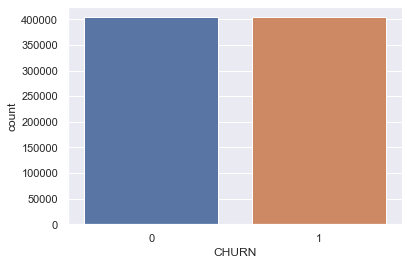

In [ ]:
sns.countplot(x='CHURN', data=df)

Explore the distribution of packages column

<AxesSubplot:xlabel='count', ylabel='TOP_PACK'>

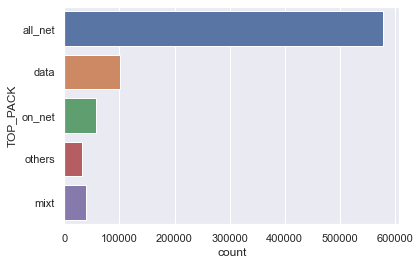

In [ ]:
sns.countplot(y='TOP_PACK', data=df)

Let's see whether the is the dependency on clients income and how many connections they have according to their packages

<AxesSubplot:xlabel='DATA_VOLUME', ylabel='REVENUE'>

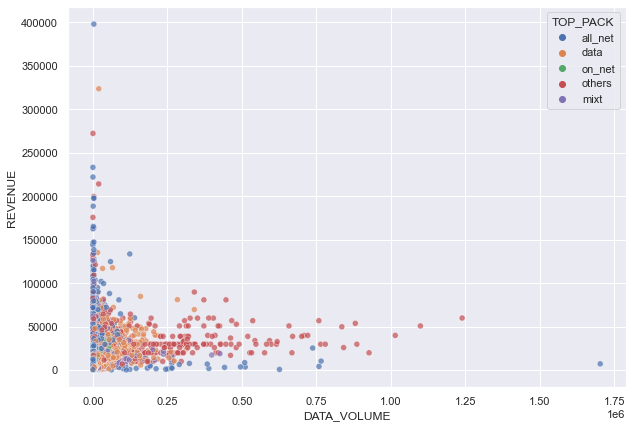

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='DATA_VOLUME', y='REVENUE', hue='TOP_PACK', alpha=0.7, data=df)

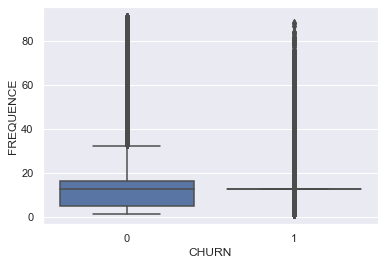

In [ ]:
sns.boxplot(y='FREQUENCE', x='CHURN', data=df);

## Derive new columns

Some value can be categorized or grouped. Thus we can create more features. Let's create how 

In [ ]:
df['income_group'] = pd.cut(df.REVENUE,
                            bins=df.REVENUE.quantile([0.0, 0.3, 0.7, 1.0]),
                            labels=['low', 'middle', 'high'])
#cut() function is a  way to transform numerical data into categorical data.
#quantile() function takes an array and a number say q between 0 and 1. It returns the value at the q th quantile.

In [ ]:
df.income_group.value_counts()

midlle    323165
low       242414
high      242392
Name: income_group, dtype: int64

Let's create new feature column that creates average of call across the packages

In [ ]:
df['avg_calls'] = (df.ON_NET + df.ORANGE) / 2

In [ ]:
df.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TOP_PACK_Imputed,income_group,avg_calls
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,I 18-21 month,2023.861068,4.519954,2089.388269,2323.867485,12.689049,3061.401195,246.115358,88.026341,NO,4,all_net,8.681143,1,1,midlle,167.070849
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,G 12-15 month,10389.119623,14.828186,6569.519809,1731.212444,12.689049,3061.401195,246.115358,88.026341,NO,2,all_net,8.681143,1,1,midlle,167.070849
17,0000a45ed15492427df603217166f1f813a2cc83,H 15-18 month,6873.607128,7.469565,3983.202161,982.961080,12.689049,3061.401195,246.115358,88.026341,NO,5,all_net,8.681143,1,1,midlle,167.070849
21,0000b00bed6ad90fd35d1957f484f9e54990c714,I 18-21 month,521.715439,3.192475,5335.989832,2771.657061,12.689049,0.000000,246.115358,88.026341,NO,36,all_net,8.681143,1,1,midlle,167.070849
22,0000b4af921db374095a9e7ab87ee314522e4fe4,K > 24 month,791.057399,8.651311,7542.140272,900.834376,12.689049,3061.401195,246.115358,88.026341,NO,4,all_net,8.681143,1,1,midlle,167.070849


## One hot encoding

Let's make one hot encoding our categorical variables.

In [ ]:
df1 = pd.get_dummies(df, columns=['TENURE', 'TOP_PACK', 'income_group'])
#get_dummies() converts categorical data into dummy or indicator variables.

In [ ]:
df1.columns

Index(['user_id', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGULARITY',
       'FREQ_TOP_PACK', 'CHURN', 'TOP_PACK_Imputed', 'avg_calls',
       'TENURE_D 3-6 month', 'TENURE_E 6-9 month', 'TENURE_F 9-12 month',
       'TENURE_G 12-15 month', 'TENURE_H 15-18 month', 'TENURE_I 18-21 month',
       'TENURE_J 21-24 month', 'TENURE_K > 24 month', 'MRG_NO',
       'TOP_PACK_all_net', 'TOP_PACK_data', 'TOP_PACK_mixt', 'TOP_PACK_on_net',
       'TOP_PACK_others', 'income_group_low', 'income_group_midlle',
       'income_group_high'],
      dtype='object')

In [ ]:
def derive_and_ohe(df):
    df['income_group'] = pd.cut(df.REVENUE,
                            bins=df.REVENUE.quantile([0.0, 0.3, 0.7, 1.0]),
                            labels=['low', 'middle', 'high'])
    df['avg_calls'] = (df.ON_NET + df.ORANGE) / 2
    df = pd.get_dummies(df, columns=['TENURE', 'TOP_PACK', 'income_group'])

    return df

Let's normalize data and split into train and test sets.

## Data Preprocessing

In [ ]:
Y = df1["CHURN"]
Xdf = df1.drop(columns = ["CHURN", "user_id"], axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGULARITY',
       'FREQ_TOP_PACK', 'avg_calls']

scaler = StandardScaler()
scaler.fit(Xdf[numerical_columns])
Xdf[numerical_columns] = scaler.transform(Xdf[numerical_columns])

In [ ]:
round(Xdf.head(), 6)

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,...,TENURE_K > 24 month,MRG_NO,TOP_PACK_all_net,TOP_PACK_data,TOP_PACK_mixt,TOP_PACK_on_net,TOP_PACK_others,income_group_low,income_group_midlle,income_group_high
1,-0.669598,-0.670229,-0.639224,0.158756,-0.0,-0.000000,0.0,0.0,-0.727643,0.0,...,0,1,1,0,0,0,0,0,1,0
12,0.714313,0.240240,0.092173,-0.131824,-0.0,-0.000000,0.0,0.0,-0.821555,0.0,...,0,1,1,0,0,0,0,0,1,0
17,0.132722,-0.409706,-0.330052,-0.498694,-0.0,-0.000000,0.0,0.0,-0.680687,0.0,...,0,1,1,0,0,0,0,0,1,0
21,-0.918106,-0.787478,-0.109205,0.378309,-0.0,-0.378854,0.0,0.0,0.774948,0.0,...,0,1,1,0,0,0,0,0,1,0
22,-0.873547,-0.305329,0.250957,-0.538961,-0.0,-0.000000,0.0,0.0,-0.727643,0.0,...,1,1,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test = train_test_split(Xdf, Y, test_size = 0.2, random_state = 5, shuffle = True, stratify = Y)

Among many machine learning algorithms, considering lack of time to try them all, and amount of data to train, we decided to use Gradient Boosting Classifier. Boosting grants power to machine learning models to improve their accuracy of prediction. Boosting algorithms are one of the most widely used algorithm in data science.

Firstly we will train and test data without cross validation, with default hyperparamters. Later, we will train and test with GridSearch and choose best estimators and compare the results.

## Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(y_test, y_pred)
#Compute confusion matrix to evaluate the accuracy of a classification. 
cm

array([[64186, 16611],
       [11164, 69634]], dtype=int64)

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

### Gradient boosting classifier with GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# It helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, you can select the best
# parameters from the listed hyperparameters.
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15],
    "max_depth":[3,5,8,10,12,15],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'n_estimators': [10]})

In [ ]:
print(clf.best_params_)

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'n_estimators': 10}


In [ ]:
y_p = clf.best_estimator_.predict(x_test)

In [ ]:
confusion_matrix(y_test, y_p)

array([[63986, 16811],
       [10885, 69913]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82     80797
           1       0.81      0.87      0.83     80798

    accuracy                           0.83    161595
   macro avg       0.83      0.83      0.83    161595
weighted avg       0.83      0.83      0.83    161595



Well, after training, our hyperparameter tuned model did not give great results. It showed only slightly increase in recall.

## XGBoost Classifier

Nevertheless, let's try also XGBClassifier from xgboost library and see the results for XGBClassifier and its ROC AUC curve.

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(x_train, y_train)

c:\programs\python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
y_preds = xgb.predict(x_test)

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82     80797
           1       0.81      0.87      0.84     80798

    accuracy                           0.83    161595
   macro avg       0.83      0.83      0.83    161595
weighted avg       0.83      0.83      0.83    161595



In general, XGBoost showed better result in recall and f1-score. But avarage ramains the same with Sklearn algorithm.

Let's see the ROC AUC curve.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_score = clf.predict_proba(x_test)[:,1]

In [ ]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)

In [ ]:
print('roc_auc_score for GBM: ', roc_auc_score(y_test, y_score))

roc_auc_score for GBM:  0.9026479414322816


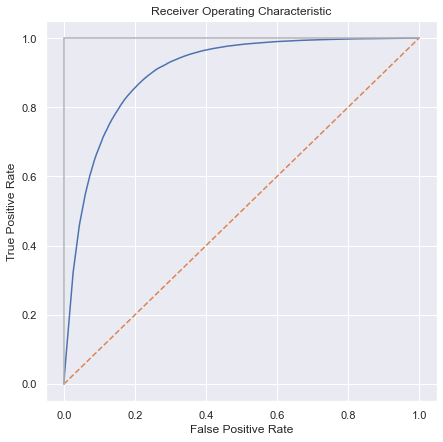

In [ ]:
plt.subplots(1, figsize=(7, 7))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Well it shows great results!

While analyzing the results we can conclude that with accuracy of 83%, our model performed very well. In order to achieve we have manipulated our data with some tricks. Perhaps on real data it can work wors due to there are a lot of changes from original ones. It would be better to have less data with missing values. Nevertheless, we will upload our data for test set.

## Inference on test set for 

In [ ]:
test = pd.read_csv('Test.csv')

In [ ]:
test.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,THIES,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,5.0,NaN,NaN,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,NaN,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NaN,NaN,NaN,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,DAKAR,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,5.0,NaN,NaN,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [ ]:
test.shape

(380127, 18)

In [ ]:
number_missing = test.isnull().sum()
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'number_missing': number_missing,
                                 'percent_missing': percent_missing})

missing_value_df

,number_missing,percent_missing
user_id,0,0.000000
REGION,149728,39.388941
TENURE,0,0.000000
MONTANT,133055,35.002775
FREQUENCE_RECH,133055,35.002775
REVENUE,127373,33.508012
ARPU_SEGMENT,127373,33.508012
FREQUENCE,127373,33.508012
DATA_VOLUME,187040,49.204608
ON_NET,138514,36.438874


In [ ]:
categorical = ['REGION', 'TENURE', 'TOP_PACK']

for i in categorical:
    print(i, '\n')
    print(test[i].value_counts())
    print('')

REGION 

DAKAR          90615
THIES          31743
SAINT-LOUIS    21369
LOUGA          17405
KAOLACK        16970
DIOURBEL       11692
TAMBACOUNDA     9819
KAFFRINE        7754
KOLDA           6805
FATICK          6360
MATAM           5232
ZIGUINCHOR      3902
SEDHIOU          543
KEDOUGOU         190
Name: REGION, dtype: int64

TENURE 

K > 24 month     360350
I 18-21 month      8153
H 15-18 month      4640
G 12-15 month      2676
J 21-24 month      2215
F 9-12 month       1654
E 6-9 month         298
D 3-6 month         141
Name: TENURE, dtype: int64

TOP_PACK 

All-net 500F=2000F;5d             56038
On net 200F=Unlimited _call24H    27187
Data:490F=1GB,7d                  20257
Data: 100 F=40MB,24H              15053
Mixt 250F=Unlimited_call24H       11960
                                  ...  
EVC_Jokko_Weekly                      1
EVC_1000=6000 F                       1
EVC_JOKKO30                           1
EVC_PACK_2.2Go                        1
WIFI_ Family _10MBPS         

In [ ]:
test.drop(['REGION', 'TIGO', 'ZONE1', 'ZONE2', ], axis=1, inplace=True)
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.0,5.0,5000.0,1667.0,5.0,NaN,378.0,11.0,NO,42,On-net 1000F=10MilF;10d,5.0
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.0,2.0,326.0,109.0,3.0,397.0,NaN,0.0,NO,41,"Data: 100 F=40MB,24H",1.0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.0,25.0,3400.0,1133.0,26.0,7150.0,0.0,2.0,NO,57,"Data: 100 F=40MB,24H",22.0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,9,NaN,NaN
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,10,NaN,NaN


In [ ]:
index = test[test.MONTANT.isna()].index
value = abs(np.random.normal(
    loc=test.MONTANT.mean(), scale=test.MONTANT.std(), size=test.MONTANT.isna().sum()))

test.MONTANT.fillna(pd.Series(value, index=index), inplace=True)

In [ ]:
index = test[test.FREQUENCE_RECH.isna()].index
value = abs(np.random.normal(
    loc=test.FREQUENCE_RECH.mean(), scale=test.FREQUENCE_RECH.std(), size=test.FREQUENCE_RECH.isna().sum()))

test.FREQUENCE_RECH.fillna(pd.Series(value, index=index), inplace=True)

In [ ]:
index = test[test.REVENUE.isna()].index
value = abs(np.random.normal(
    loc=test.REVENUE.mean(), scale=test.REVENUE.std(), size=test.REVENUE.isna().sum()))

test.REVENUE.fillna(pd.Series(value, index=index), inplace=True)

In [ ]:
index = test[test.ARPU_SEGMENT.isna()].index
value = abs(np.random.normal(
    loc=test.ARPU_SEGMENT.mean(), scale=test.ARPU_SEGMENT.std(), size=test.ARPU_SEGMENT.isna().sum()))

test.ARPU_SEGMENT.fillna(pd.Series(value, index=index), inplace=True)

In [ ]:
test.FREQUENCE.fillna(test.FREQUENCE.mean(), inplace=True)
test.DATA_VOLUME.fillna(test.DATA_VOLUME.mean(), inplace=True)
test.ON_NET.fillna(test.ON_NET.mean(), inplace=True)
test.ORANGE.fillna(test.ORANGE.mean(), inplace=True)
test.FREQ_TOP_PACK.fillna(test.FREQ_TOP_PACK.mean(), inplace=True)

In [ ]:
# from https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893

def impute_nan_add_vairable(DataFrame,ColName):    
    #1. add new column and replace if category is null then 1 else 0
    DataFrame[ColName+"_Imputed"] =   np.where(DataFrame[ColName].isnull(),1,0)
    
    # 2. Take most occured category in that vairable (.mode())
    
    Mode_Category = DataFrame[ColName].mode()[0]
    
    ## 2.1 Replace NAN values with most occured category in actual vairable
    
    DataFrame[ColName].fillna(Mode_Category,inplace=True)
    
    
impute_nan_add_vairable(test, 'TOP_PACK')

In [ ]:
test.shape

(380127, 15)

In [ ]:
test.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,TOP_PACK_Imputed
count,380127.000000,380127.000000,380127.000000,380127.000000,380127.000000,380127.000000,380127.000000,380127.000000,380127.000000,380127.000000,380127.000000
mean,6151.200854,12.503028,6120.074636,2035.877015,13.957963,3346.095454,278.806310,95.193008,28.081699,9.261584,0.417700
std,6587.030222,12.324588,6678.835910,2224.999947,11.948155,8554.386283,697.000448,156.175430,22.289094,9.362221,0.493181
min,0.050741,0.000048,0.030244,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1500.000000,3.000000,1448.000000,481.946933,6.000000,232.000000,12.000000,20.000000,6.000000,4.000000,0.000000
50%,4194.606882,8.970974,4087.633128,1353.870707,13.957963,3346.095454,212.000000,95.193008,24.000000,9.261584,0.000000
75%,8827.301778,18.000000,8801.451069,2931.754617,13.957963,3346.095454,278.806310,95.193008,51.000000,9.261584,1.000000
max,201500.000000,146.000000,200965.000000,66988.000000,91.000000,977796.000000,26786.000000,6345.000000,62.000000,390.000000,1.000000


In [ ]:
test.isnull().sum()

user_id             0
TENURE              0
MONTANT             0
FREQUENCE_RECH      0
REVENUE             0
ARPU_SEGMENT        0
FREQUENCE           0
DATA_VOLUME         0
ON_NET              0
ORANGE              0
MRG                 0
REGULARITY          0
TOP_PACK            0
FREQ_TOP_PACK       0
TOP_PACK_Imputed    0
dtype: int64

In [ ]:
categorical = ['TENURE', 'TOP_PACK']

for i in categorical:
    print(i, '\n')
    print(test[i].value_counts())
    print('')

TENURE 

K > 24 month     360350
I 18-21 month      8153
H 15-18 month      4640
G 12-15 month      2676
J 21-24 month      2215
F 9-12 month       1654
E 6-9 month         298
D 3-6 month         141
Name: TENURE, dtype: int64

TOP_PACK 

All-net 500F=2000F;5d             214817
On net 200F=Unlimited _call24H     27187
Data:490F=1GB,7d                   20257
Data: 100 F=40MB,24H               15053
Mixt 250F=Unlimited_call24H        11960
                                   ...  
EVC_Jokko_Weekly                       1
EVC_1000=6000 F                        1
EVC_JOKKO30                            1
EVC_PACK_2.2Go                         1
WIFI_ Family _10MBPS                   1
Name: TOP_PACK, Length: 102, dtype: int64



In [ ]:
all_net = test[test.TOP_PACK.map(lambda x: x.lower().startswith('all'))]
on_net = test[test.TOP_PACK.map(lambda x: x.lower().startswith('on'))]
data = test[test.TOP_PACK.map(lambda x: x.lower().startswith('data'))]
mixt = test[test.TOP_PACK.map(lambda x: x.lower().startswith('mixt'))]

In [ ]:
print(all_net.TOP_PACK.unique())
print(on_net.TOP_PACK.unique())
print(data.TOP_PACK.unique())
print(mixt.TOP_PACK.unique())

['All-net 500F=2000F;5d' 'All-net 500F =2000F_AllNet_Unlimited'
 'All-net 1000F=(3000F On+3000F Off);5d' 'All-net 600F= 3000F ;5d'
 'All-net 1000=5000;5d' 'All-net 500F=1250F_AllNet_1250_Onnet;48h'
 'All-net 300=600;2d' 'All-net 5000= 20000off+20000on;30d'
 'All-net 500F=4000F ; 5d']
['On-net 1000F=10MilF;10d' 'On net 200F=Unlimited _call24H'
 'On-net 500=4000,10d' 'On-net 200F=60mn;1d' 'On-net 300F=1800F;3d'
 'On-net 500F_FNF;3d' 'On net 200F= 3000F_10Mo ;24H'
 'On-net 2000f_One_Month_100H; 30d']
['Data: 100 F=40MB,24H' 'Data:490F=1GB,7d' 'Data: 200 F=100MB,24H'
 'Data:1000F=2GB,30d' 'Data:3000F=10GB,30d' 'Data:200F=Unlimited,24H'
 'Data:1000F=5GB,7d' 'Data:300F=100MB,2d' 'Data:DailyCycle_Pilot_1.5GB'
 'Data:500F=2GB,24H' 'Data:1500F=3GB,30D' 'Data:700F=1.5GB,7d'
 'Data:50F=30MB_24H' 'Data:150F=SPPackage1,24H' 'DataPack_Incoming'
 'Data:30Go_V 30_Days' 'Data:700F=SPPackage1,7d'
 'Data:1500F=SPPackage1,30d' 'Data: 490F=Night,00H-08H'
 'Data: 200F=1GB,24H' 'Data_EVC_2Go24H']
['MIXT:500F

In [ ]:
test = test.replace(to_replace=all_net.TOP_PACK.unique(), value='all_net')
test = test.replace(to_replace=on_net.TOP_PACK.unique(), value='on_net')
test = test.replace(to_replace=data.TOP_PACK.unique(), value='data')
test = test.replace(to_replace=mixt.TOP_PACK.unique(), value='mixt')

test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,TOP_PACK_Imputed
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,NO,42,on_net,5.000000,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,NO,41,data,1.000000,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,NO,57,data,22.000000,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5906.790947,13.733785,1544.108004,2195.903244,13.957963,3346.095454,278.80631,95.193008,NO,9,all_net,9.261584,1
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,4676.694097,40.572803,6074.013862,1941.223364,13.957963,3346.095454,278.80631,95.193008,NO,10,all_net,9.261584,1


In [ ]:
test.TOP_PACK.value_counts().index

Index(['all_net', 'data', 'on_net', 'mixt', 'Jokko_Daily',
       'IVR Echat_Daily_50F', 'VAS(IVR_Radio_Daily)', 'Twter_U2opia_Daily',
       'Twter_U2opia_Weekly', '200=Unlimited1Day', 'Jokko_promo',
       'Facebook_MIX_2D', 'Jokko_Monthly', 'Pilot_Youth4_490',
       'CVM_on-net bundle 500=5000', 'MROMO_TIMWES_OneDAY',
       'MROMO_TIMWES_RENEW', 'WIFI_Family_2MBPS', 'New_YAKALMA_4_ALL',
       'Yewouleen_PKG', 'YMGX 100=1 hour FNF, 24H/1 month',
       'Twter_U2opia_Monthly', 'Internat: 1000F_Zone_1;24H\t\t',
       'Pilot_Youth1_290', 'SUPERMAGIK_5000', 'SUPERMAGIK_1000',
       'FNF2 ( JAPPANTE)', 'Jokko_Weekly', 'WIFI_ Family _4MBPS',
       'EVC_500=2000F', '500=Unlimited3Day', 'IVR Echat_Weekly_200F',
       'FIFA_TS_daily', 'Staff_CPE_Rent', 'VAS(IVR_Radio_Monthly)',
       '200F=10mnOnNetValid1H', 'TelmunCRBT_daily', 'EVC_100Mo',
       'Incoming_Bonus_woma', 'CVM_200f=400MB',
       'Internat: 1000F_Zone_3;24h\t\t', 'Internat: 2000F_Zone_2;24H\t\t',
       '1000=Unlimited7

In [ ]:
test = test.replace(to_replace=test.TOP_PACK.value_counts().index[4:], value='others')

In [ ]:
test.TOP_PACK.value_counts()

all_net    227143
data        63812
on_net      40699
mixt        27919
others      20554
Name: TOP_PACK, dtype: int64

In [ ]:
test['income_group'] = pd.cut(test.REVENUE,
                            bins=test.REVENUE.quantile([0.0, 0.3, 0.7, 1.0]),
                            labels=['low', 'midlle', 'high'])

In [ ]:
test.income_group.value_counts()

midlle    152051
high      114038
low       114037
Name: income_group, dtype: int64

In [ ]:
test['avg_calls'] = (test.ON_NET + test.ORANGE) / 2

In [ ]:
test.head()

,user_id,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,TOP_PACK_Imputed,income_group,avg_calls
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,K > 24 month,5000.000000,5.000000,5000.000000,1667.000000,5.000000,3346.095454,378.00000,11.000000,NO,42,on_net,5.000000,0,midlle,194.500000
1,000055d41c8a62052dd426592e8a4a3342bf565d,I 18-21 month,300.000000,2.000000,326.000000,109.000000,3.000000,397.000000,278.80631,0.000000,NO,41,data,1.000000,0,low,139.403155
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,K > 24 month,3300.000000,25.000000,3400.000000,1133.000000,26.000000,7150.000000,0.00000,2.000000,NO,57,data,22.000000,0,midlle,1.000000
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,K > 24 month,5906.790947,13.733785,1544.108004,2195.903244,13.957963,3346.095454,278.80631,95.193008,NO,9,all_net,9.261584,1,low,186.999659
4,0000bae5480628cf8fe51ad84bcb39772fc79224,K > 24 month,4676.694097,40.572803,6074.013862,1941.223364,13.957963,3346.095454,278.80631,95.193008,NO,10,all_net,9.261584,1,midlle,186.999659


In [ ]:
test1 = pd.get_dummies(test, columns=['TENURE', 'MRG', 'TOP_PACK', 'income_group'])

In [ ]:
test1.columns

Index(['user_id', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'REGULARITY',
       'FREQ_TOP_PACK', 'TOP_PACK_Imputed', 'avg_calls', 'TENURE_D 3-6 month',
       'TENURE_E 6-9 month', 'TENURE_F 9-12 month', 'TENURE_G 12-15 month',
       'TENURE_H 15-18 month', 'TENURE_I 18-21 month', 'TENURE_J 21-24 month',
       'TENURE_K > 24 month', 'MRG_NO', 'TOP_PACK_all_net', 'TOP_PACK_data',
       'TOP_PACK_mixt', 'TOP_PACK_on_net', 'TOP_PACK_others',
       'income_group_low', 'income_group_midlle', 'income_group_high'],
      dtype='object')

In [ ]:
scaler = StandardScaler()
scaler.fit(test1[numerical_columns])
test1[numerical_columns] = scaler.transform(test1[numerical_columns])

In [ ]:
round(test1.head(), 6)

,user_id,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,...,TENURE_K > 24 month,MRG_NO,TOP_PACK_all_net,TOP_PACK_data,TOP_PACK_mixt,TOP_PACK_on_net,TOP_PACK_others,income_group_low,income_group_midlle,income_group_high
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,-0.174768,-0.608786,-0.167705,-0.165788,-0.749737,0.000000,0.142315,-0.539093,0.624445,...,1,1,0,0,0,1,0,0,1,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,-0.888292,-0.852202,-0.867529,-0.866013,-0.917127,-0.344747,0.000000,-0.609527,0.579580,...,0,1,0,1,0,0,0,1,0,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,-0.432851,1.013988,-0.407268,-0.405788,1.007859,0.444674,-0.400009,-0.596721,1.297421,...,1,1,0,1,0,0,0,0,1,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,-0.037105,0.099862,-0.685145,0.071922,0.000000,0.000000,0.000000,0.000000,-0.856101,...,1,1,1,0,0,0,0,1,0,0
4,0000bae5480628cf8fe51ad84bcb39772fc79224,-0.223850,2.277546,-0.006897,-0.042541,0.000000,0.000000,0.000000,0.000000,-0.811236,...,1,1,1,0,0,0,0,0,1,0


In [ ]:
to_test = test1.drop(['user_id'], axis=1)
#The drop() function is used to drop specified labels from rows or columns.
to_test.head()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,REGULARITY,FREQ_TOP_PACK,...,TENURE_K > 24 month,MRG_NO,TOP_PACK_all_net,TOP_PACK_data,TOP_PACK_mixt,TOP_PACK_on_net,TOP_PACK_others,income_group_low,income_group_midlle,income_group_high
0,-0.174768,-0.608786,-0.167705,-0.165788,-7.497371e-01,5.315962e-17,1.423153e-01,-0.539093,0.624445,-4.551900e-01,...,1,1,0,0,0,1,0,0,1,0
1,-0.888292,-0.852202,-0.867529,-0.866013,-9.171272e-01,-3.447470e-01,8.155446e-17,-0.609527,0.579580,-8.824396e-01,...,0,1,0,1,0,0,0,1,0,0
2,-0.432851,1.013988,-0.407268,-0.405788,1.007859e+00,4.446736e-01,-4.000093e-01,-0.596721,1.297421,1.360621e+00,...,1,1,0,1,0,0,0,0,1,0
3,-0.037105,0.099862,-0.685145,0.071922,4.460168e-16,5.315962e-17,8.155446e-17,0.000000,-0.856101,-1.897369e-16,...,1,1,1,0,0,0,0,1,0,0
4,-0.223850,2.277546,-0.006897,-0.042541,4.460168e-16,5.315962e-17,8.155446e-17,0.000000,-0.811236,-1.897369e-16,...,1,1,1,0,0,0,0,0,1,0


In [ ]:
predictions = clf.best_estimator_.predict(to_test)

In [ ]:
submission = pd.DataFrame(zip(test1['user_id'], predictions), columns=['user_id', 'prediction'])
submission.head()

,user_id,prediction
0,00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0
1,000055d41c8a62052dd426592e8a4a3342bf565d,0
2,000081dd3245e6869a4a9c574c7050e7bb84c2c8,0
3,0000b76d2145d9445d9ff6b65c9ebc4196c89337,1
4,0000bae5480628cf8fe51ad84bcb39772fc79224,1


In [ ]:
submission.prediction.value_counts()

0    218706
1    161421
Name: prediction, dtype: int64

In [ ]:
submission.to_csv('submission.csv', index=False)